# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
response=requests.get('https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68')
Nangane=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490')
Taipei=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f')
Banqiao=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd')
Taoyuan=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4')
Hsinchu=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3')
Miaoli=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779')
Taichung=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e')
Changhua=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f')
Yunlin=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7')
Chiayi=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814')
Tainan=BeautifulSoup(response.text,'html.parser')

response=requests.get('https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356')
Zuoying=BeautifulSoup(response.text,'html.parser')

In [3]:
# crawler the information(address,hours,ticketing hours) of each station
def information(city):
    info=city.find(class_='col-md-4').text
    info=info.split('\n')
    while '' in info:
        info.remove('')
    return info

info=[]
station_en=[Nangane,Taipei,Banqiao,Taoyuan,Hsinchu,Miaoli,Taichung,Changhua,Yunlin,Chiayi,
         Tainan,Zuoying]
for i in station_en:
    info.append(information(i))

In [4]:
# crawler the operation hours and ticketing hours of each station
station=['南港','台北','板橋','桃園','新竹','苗栗','台中','彰化','雲林','嘉義','台南','左營']
for i in range(len(info)):
    info[i][1]=info[i][1].replace('營業時間：','')
    info[i][2]=info[i][2].replace('售票時間：','')
for i in range(len(info)):
    info[i].insert(0,station[i])

In [5]:
# create a DataFrame
pd.DataFrame(data=info,columns=['station','address','operation_hours','ticketing_hours'])

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [6]:
# crawler GDP
response=requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
soup=BeautifulSoup(response.text,'html.parser')
gdp=soup.find_all('tbody',limit=3)
gdp=gdp[2].text.split('\n')
while '' in gdp:
    gdp.remove('')
del gdp[0:11]
for i in range(len(gdp)):
    if '\xa0'in gdp[i]:
        gdp[i]=gdp[i].replace('\xa0','')
    if '[n 2]'in gdp[i]:
        gdp[i]=gdp[i].replace('[n 2]','')
    if '[n 3]'in gdp[i]:
        gdp[i]=gdp[i].replace('[n 3]','')
    if '[n 4]'in gdp[i]:
        gdp[i]=gdp[i].replace('[n 4]','')
    if '[15]'in gdp[i]:
        gdp[i]=gdp[i].replace('[15]','')
    if '[n 5]'in gdp[i]:
        gdp[i]=gdp[i].replace('[n 5]','')
gdp=[gdp[i:i+8] for i in range(0,len(gdp),8)]

In [7]:
# create GDP DataFrame
GDP=pd.DataFrame(data=gdp,columns=['Country','Region','IMF_Estimate','IMF_Year',
'United_Nations_Estimate','United_Nations_Year','World_Bank_Estimate','World_Bank_Year'])
GDP=GDP.head(50)
GDP

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [8]:
# crawler CPI
response=requests.get('https://en.wikipedia.org/wiki/Corruption_Perceptions_Index')
soup=BeautifulSoup(response.text,'html.parser')
cpi=soup.find_all('tbody',limit=5)
cpi=cpi[4].text.split('\n')
while '' in cpi:
    cpi.remove('')
del cpi[0:29]
for i in range(len(cpi)):
    if '\xa0'in cpi[i]:
        cpi[i]=cpi[i].replace('\xa0','')
    cpi[i]=cpi[i].lstrip()
cpi_2020=[]
for i in range(len(cpi)):
    if cpi[i].isdigit() == False:
        cpi_2020.append(cpi[i])
        cpi_2020.append(cpi[i+1])
cpi_2020=[cpi_2020[i:i+2] for i in range(0,len(cpi_2020),2)]

In [9]:
# CPI DataFrame
CPI=pd.DataFrame(data=cpi_2020,columns=['Country','CPI_2020'])
CPI=CPI.head(100)
CPI

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [10]:
# merge GDP and CPI DataFrame
GDP_CPI=pd.merge(GDP,CPI,how='inner')
GDP_CPI

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020,67
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020,61


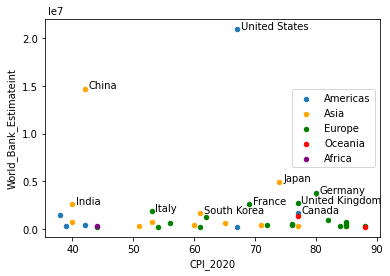

In [11]:
# plot
#let CPI_2020,World_Bank_Estimate to int
GDP_CPI=pd.merge(GDP,CPI,how='inner')
for i in range(len(GDP_CPI['CPI_2020'])):
    GDP_CPI['CPI_2020'][i]=int(GDP_CPI['CPI_2020'][i])
    GDP_CPI['World_Bank_Estimate'][i]=GDP_CPI['World_Bank_Estimate'][i].replace(',','')
    GDP_CPI['World_Bank_Estimate'][i]=int(GDP_CPI['World_Bank_Estimate'][i])/10000000
    
#groupby('Region')
Americas=GDP_CPI.groupby('Region').get_group('Americas')
Asia=GDP_CPI.groupby('Region').get_group('Asia')
Europe=GDP_CPI.groupby('Region').get_group('Europe')
Oceania=GDP_CPI.groupby('Region').get_group('Oceania')
Africa=GDP_CPI.groupby('Region').get_group('Africa')

#top 10
top_x=GDP_CPI.head(10)['CPI_2020'].values
top_y=GDP_CPI.head(10)['World_Bank_Estimate'].values
top_index=GDP_CPI.head(10)['Country'].values

plt.scatter(Americas['CPI_2020'],Americas['World_Bank_Estimate'],s=20)
plt.scatter(Asia['CPI_2020'],Asia['World_Bank_Estimate'],s=20,color='orange')
plt.scatter(Europe['CPI_2020'],Europe['World_Bank_Estimate'],s=20,color='green')
plt.scatter(Oceania['CPI_2020'],Oceania['World_Bank_Estimate'],s=20,color='red')
plt.scatter(Africa['CPI_2020'],Africa['World_Bank_Estimate'],s=20,color='purple')
plt.xlabel("CPI_2020")
plt.ylabel("World_Bank_Estimateint")
plt.text(36,2.25,'le7')
plt.legend(labels=['Americas','Asia','Europe','Oceania','Africa'],loc='center right')
for i in range(len(top_x)):
    plt.annotate(top_index[i],xy=(top_x[i],top_y[i]),xytext=(top_x[i]+0.6,top_y[i]))
